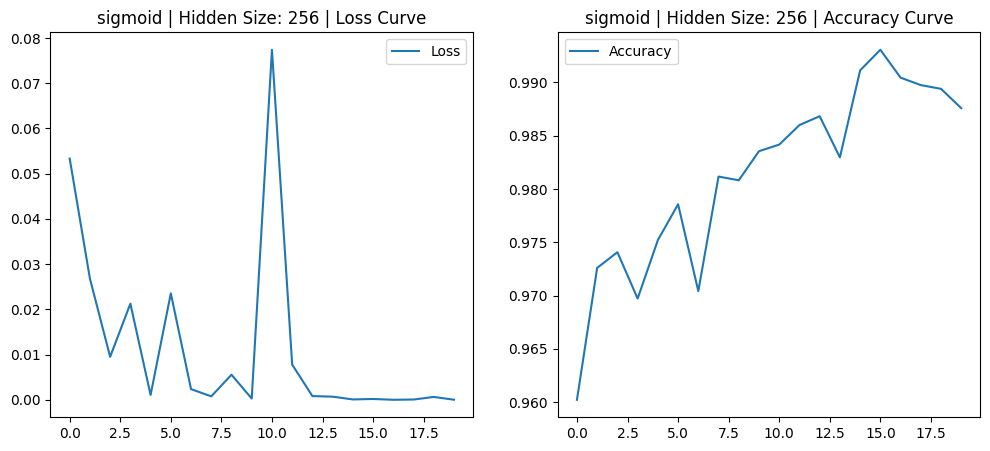

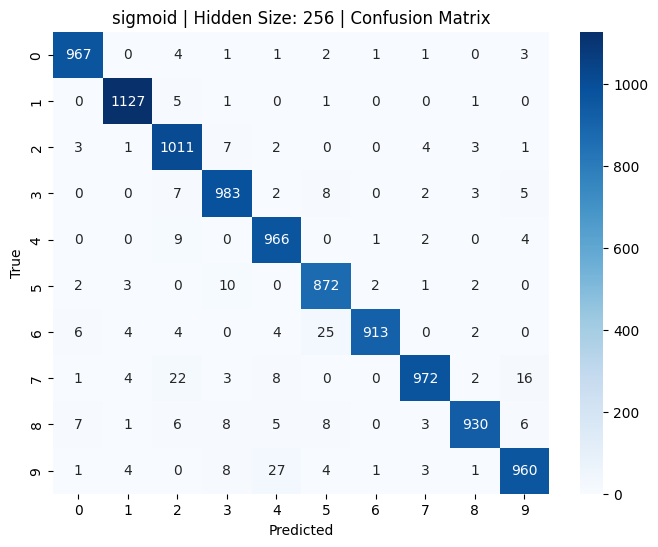

Activation: sigmoid, Hidden Size: 256, Test Accuracy: 0.9701, Time Taken: 794.54 seconds


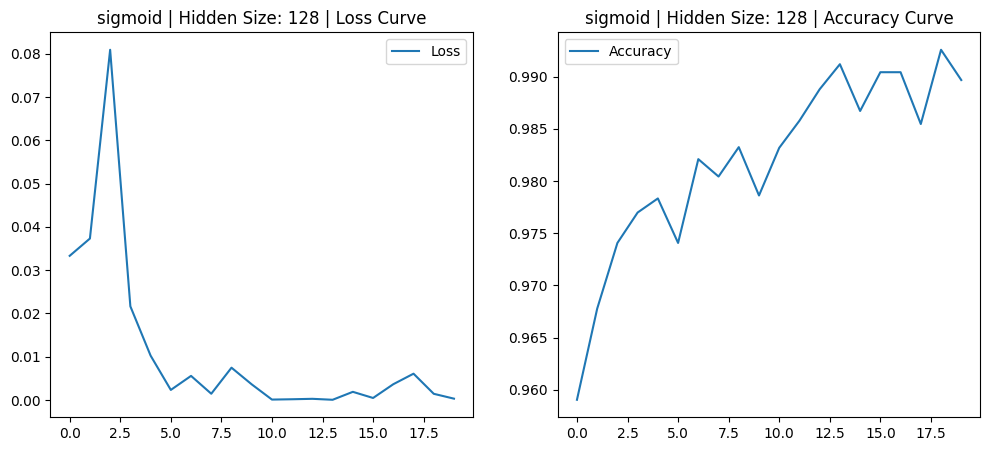

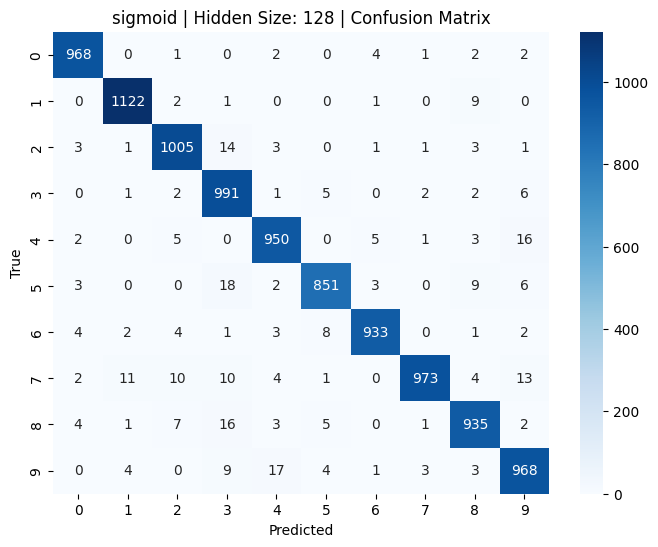

Activation: sigmoid, Hidden Size: 128, Test Accuracy: 0.9696, Time Taken: 487.57 seconds


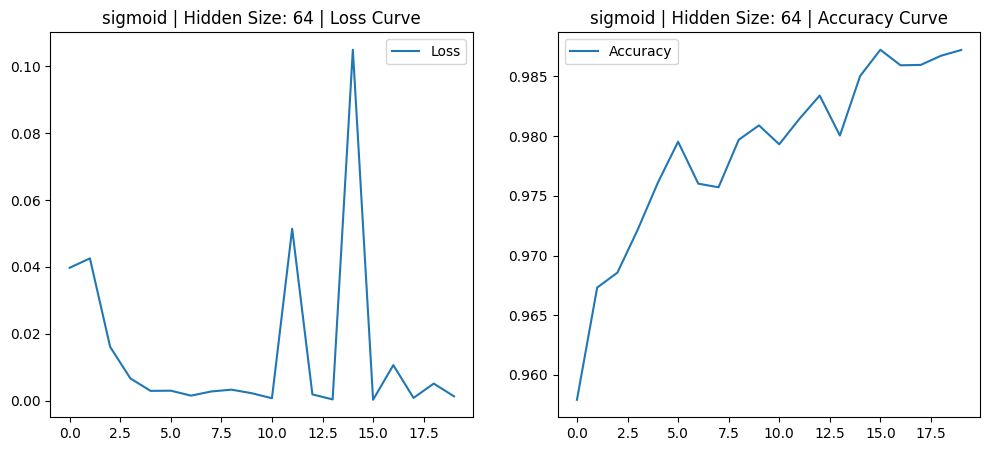

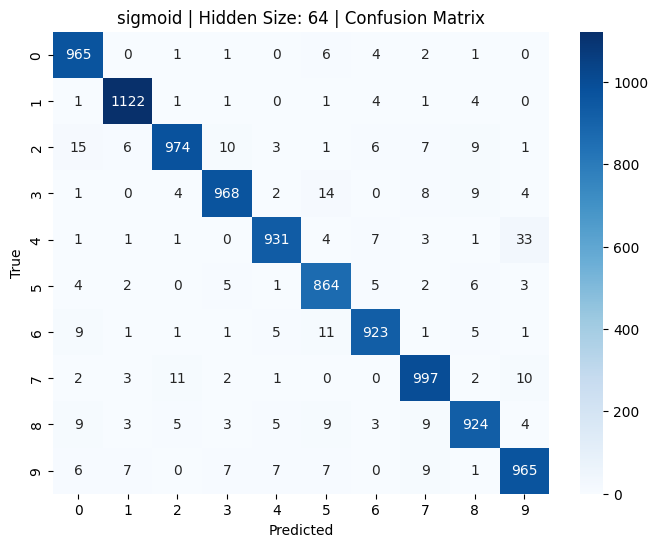

Activation: sigmoid, Hidden Size: 64, Test Accuracy: 0.9633, Time Taken: 303.65 seconds


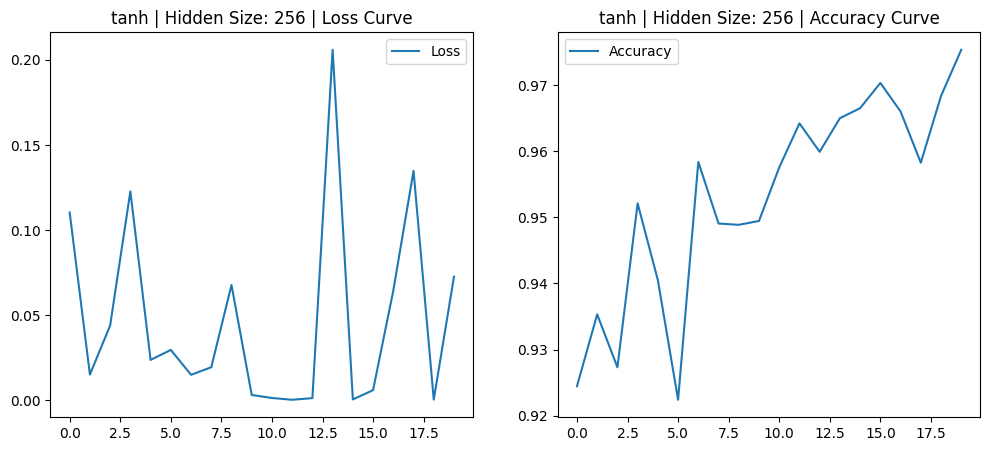

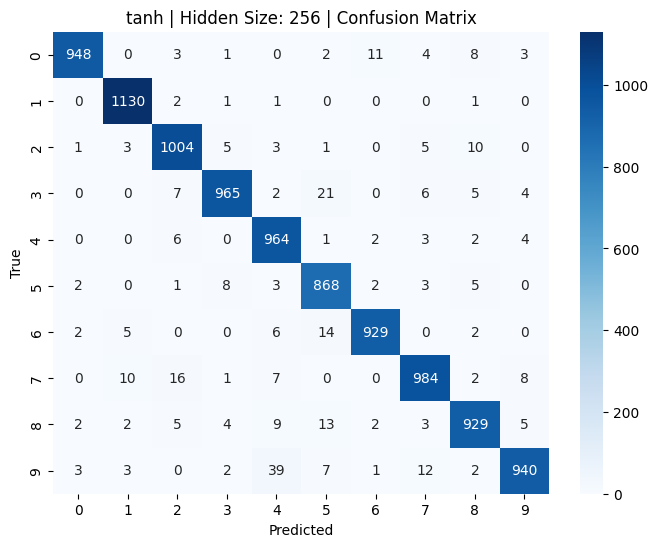

Activation: tanh, Hidden Size: 256, Test Accuracy: 0.9661, Time Taken: 352.44 seconds


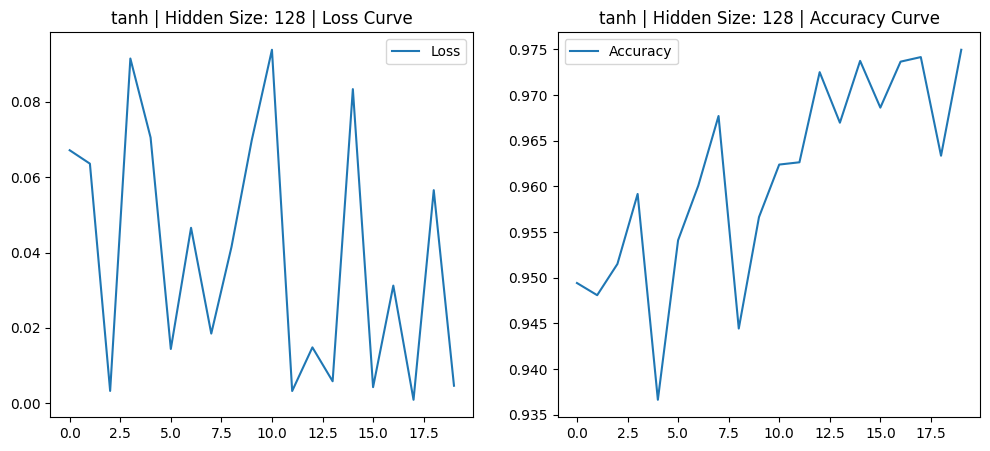

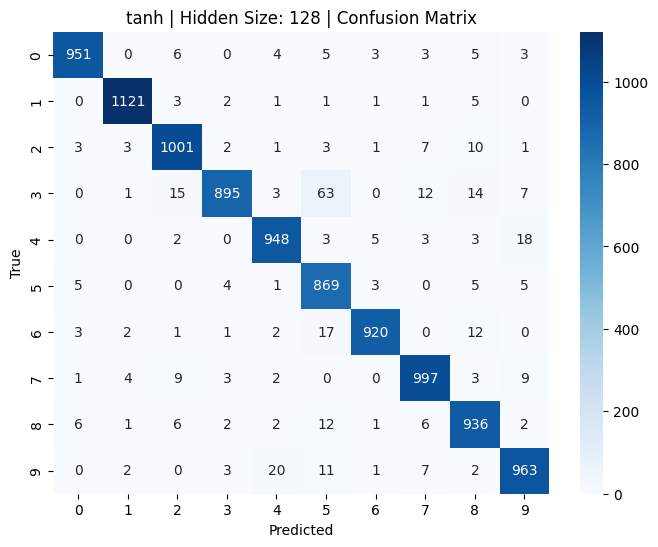

Activation: tanh, Hidden Size: 128, Test Accuracy: 0.9601, Time Taken: 323.27 seconds


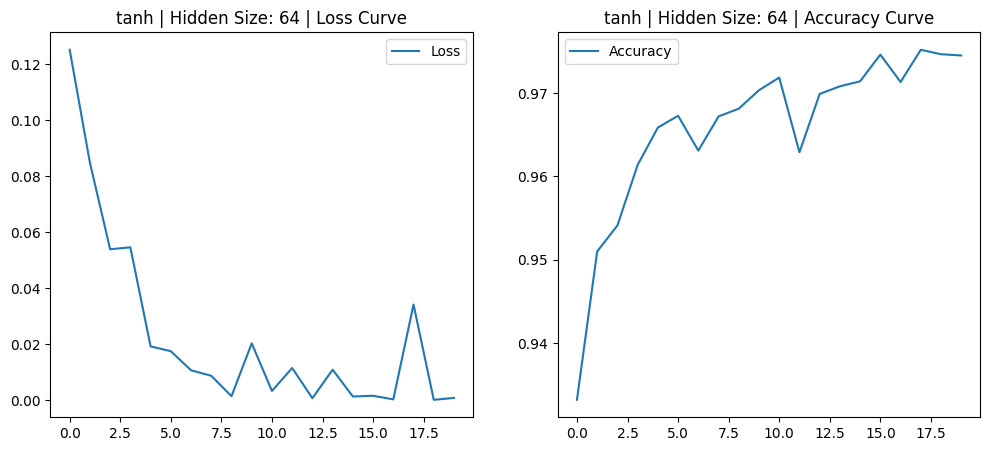

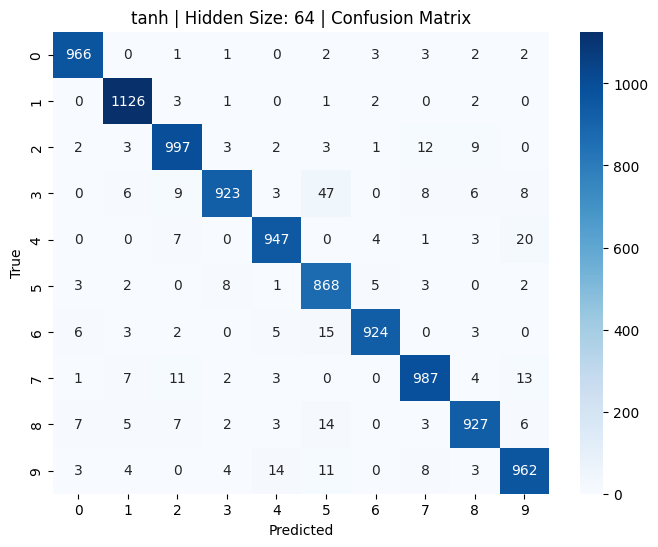

Activation: tanh, Hidden Size: 64, Test Accuracy: 0.9627, Time Taken: 298.79 seconds


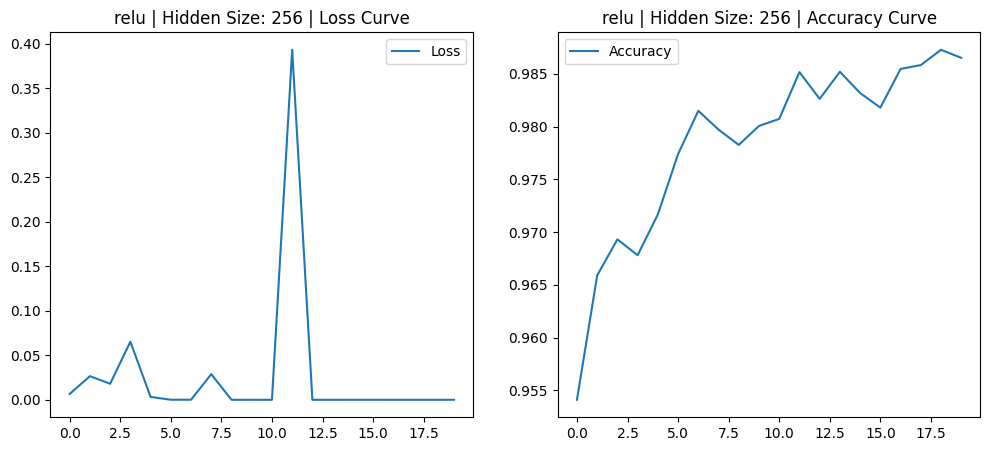

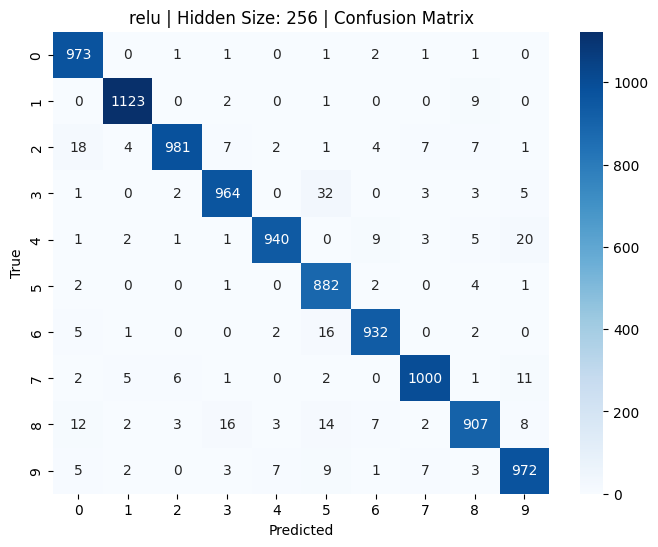

Activation: relu, Hidden Size: 256, Test Accuracy: 0.9674, Time Taken: 355.16 seconds


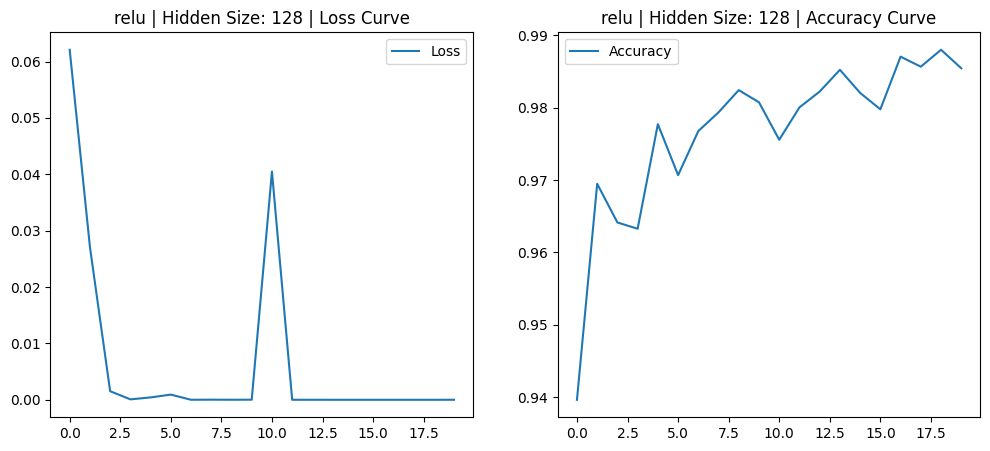

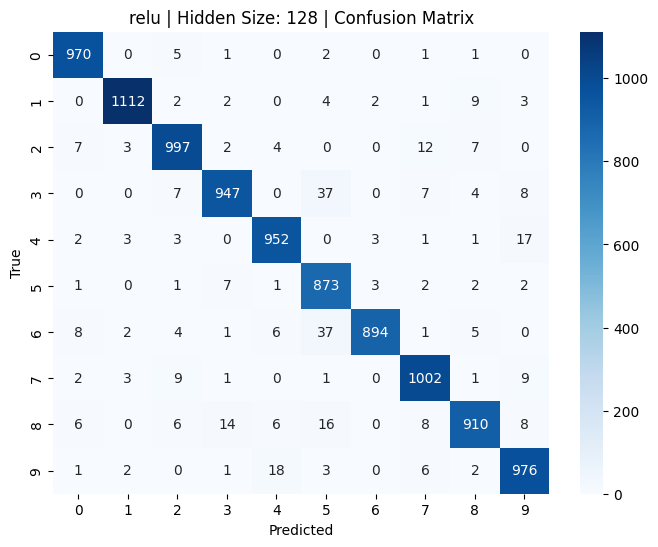

Activation: relu, Hidden Size: 128, Test Accuracy: 0.9633, Time Taken: 331.42 seconds


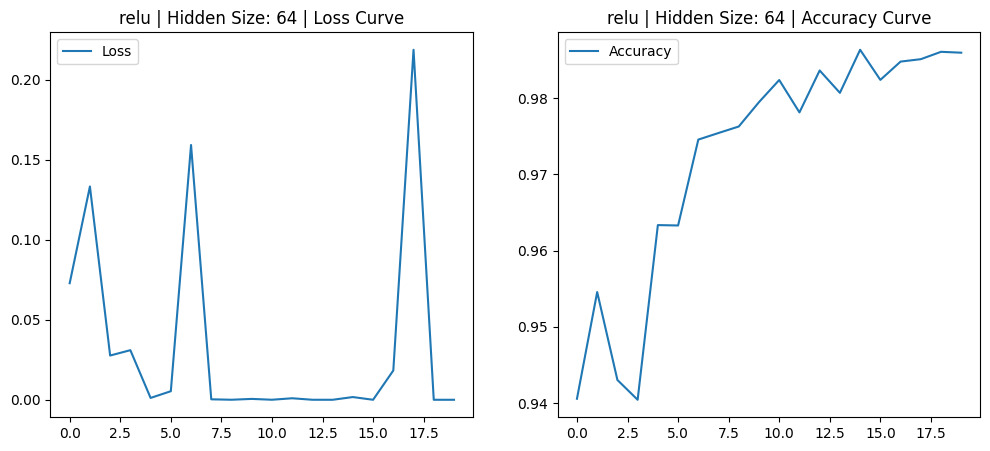

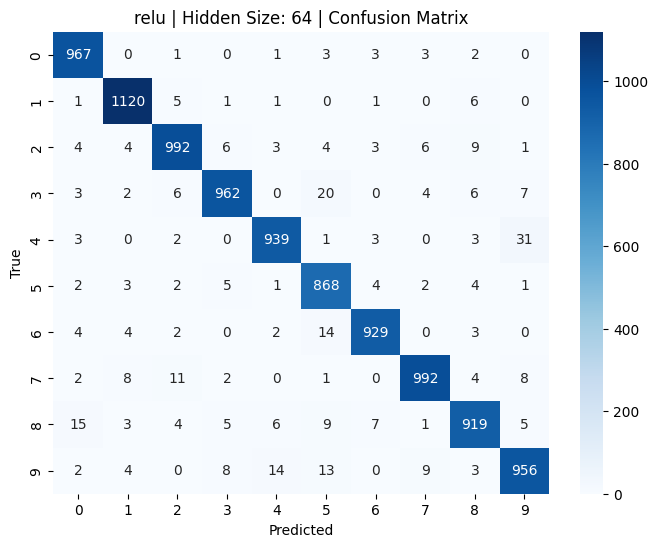

Activation: relu, Hidden Size: 64, Test Accuracy: 0.9644, Time Taken: 297.24 seconds
Evaluation completed.


In [9]:
import time
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

# Parameters
activations = ['sigmoid', 'tanh', 'relu']
hidden_layer_sizes = [256, 128, 64]
learning_rate = 0.01
batch_size = 64
epochs = 20

# Activation functions in TensorFlow
def activate(x, activation):
    if activation == 'sigmoid':
        return tf.nn.sigmoid(x)
    elif activation == 'tanh':
        return tf.nn.tanh(x)
    elif activation == 'relu':
        return tf.nn.relu(x)

# Initialize weights and biases using TensorFlow variables

def initialize_parameters(input_size, hidden_size, output_size):
    initializer = tf.initializers.GlorotUniform()
    W1 = tf.Variable(initializer([input_size, hidden_size]))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    W2 = tf.Variable(initializer([hidden_size, output_size]))
    b2 = tf.Variable(tf.zeros([output_size]))
    return W1, b1, W2, b2

# Forward pass
def forward_pass(x, W1, b1, W2, b2, activation):
    Z1 = tf.add(tf.matmul(x, W1), b1)
    A1 = activate(Z1, activation)
    Z2 = tf.add(tf.matmul(A1, W2), b2)
    return Z2

# Train model using TensorFlow

def train_model(x_train, y_train, x_test, y_test, activation, hidden_size):
    input_size = 784
    output_size = 10
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    optimizer = tf.optimizers.Adam(learning_rate)

    losses = []
    accuracies = []
    start_time = time.time()

    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            x_batch = x_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                logits = forward_pass(x_batch, W1, b1, W2, b2, activation)
                loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_batch, logits=logits))

            gradients = tape.gradient(loss, [W1, b1, W2, b2])
            optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))

        losses.append(loss.numpy())

        # Accuracy calculation
        logits_train = forward_pass(x_train, W1, b1, W2, b2, activation)
        predictions = np.argmax(logits_train.numpy(), axis=1)
        accuracy = accuracy_score(y_train, predictions)
        accuracies.append(accuracy)

    time_taken = time.time() - start_time

    # Test accuracy
    logits_test = forward_pass(x_test, W1, b1, W2, b2, activation)
    y_pred = np.argmax(logits_test.numpy(), axis=1)

    # Plot Results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Loss')
    plt.title(f'{activation} | Hidden Size: {hidden_size} | Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Accuracy')
    plt.title(f'{activation} | Hidden Size: {hidden_size} | Accuracy Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{activation} | Hidden Size: {hidden_size} | Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"Activation: {activation}, Hidden Size: {hidden_size}, Test Accuracy: {accuracy_score(y_test, y_pred):.4f}, Time Taken: {time_taken:.2f} seconds")

# Run training for all combinations
for activation in activations:
    for hidden_size in hidden_layer_sizes:
        train_model(x_train, y_train, x_test, y_test, activation, hidden_size)

print("Evaluation completed.")
